In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../data/employee_data.csv')

In [3]:
df.shape

(10000, 10)

In [4]:
df.describe()

,employee_id,age,salary,tenure_years,enrolled
count,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000
mean,15000.50000,43.0020,65032.967907,3.967720,0.617400
std,2886.89568,12.2858,14923.958446,3.895488,0.486046
min,10001.00000,22.0000,2207.790000,0.000000,0.000000
25%,12500.75000,33.0000,54714.342500,1.200000,0.000000
50%,15000.50000,43.0000,65056.050000,2.800000,1.000000
75%,17500.25000,54.0000,75053.687500,5.600000,1.000000
max,20000.00000,64.0000,120312.000000,36.000000,1.000000


In [5]:
df.isnull().sum()

employee_id        0
age                0
gender             0
marital_status     0
salary             0
employment_type    0
region             0
has_dependents     0
tenure_years       0
enrolled           0
dtype: int64

In [6]:
df['enrolled'].value_counts()

enrolled
1    6174
0    3826
Name: count, dtype: int64

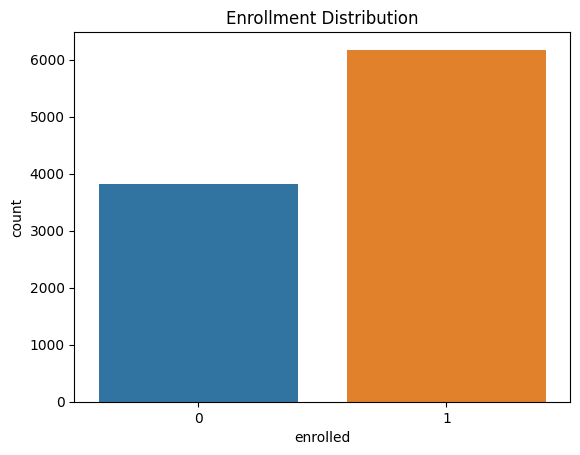

enrolled
1    0.6174
0    0.3826
Name: proportion, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='enrolled', data=df)
plt.title("Enrollment Distribution")
plt.show()

print(df['enrolled'].value_counts(normalize=True))


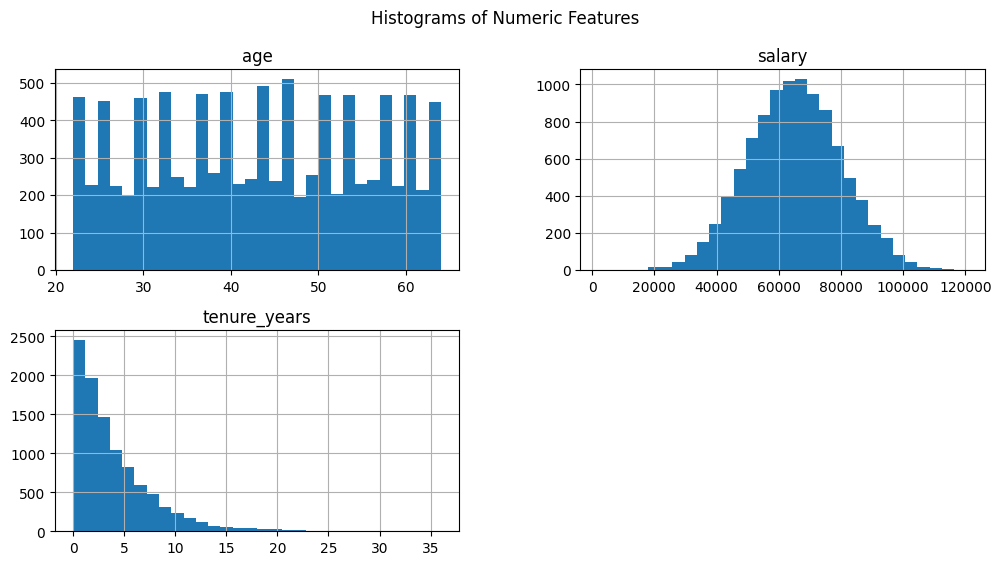

age            -0.001981
salary          0.003895
tenure_years    1.973960
dtype: float64


In [8]:
num_cols = ['age', 'salary', 'tenure_years']

df[num_cols].hist(figsize=(12, 6), bins=30)
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Check skewness
print(df[num_cols].skew())


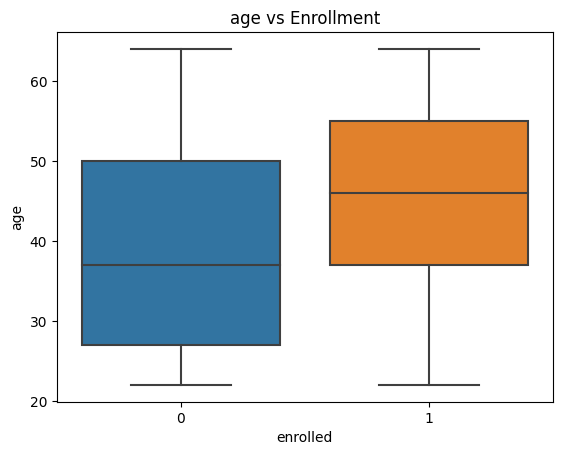

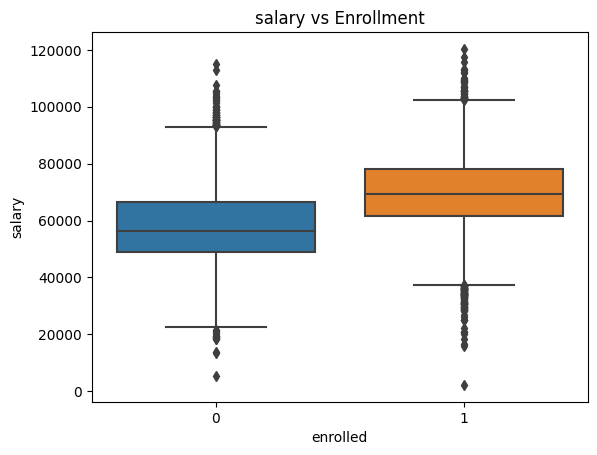

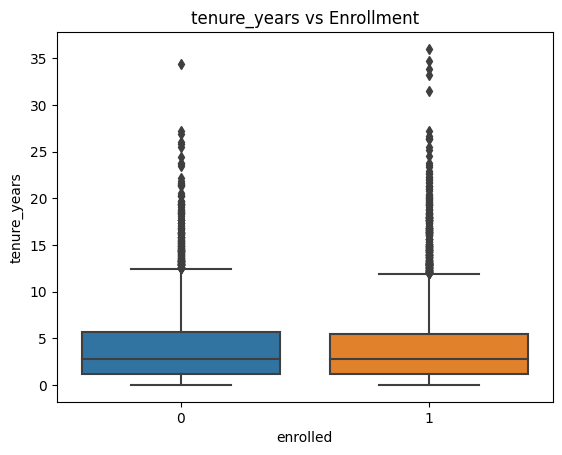

In [9]:
for col in num_cols:
    sns.boxplot(x='enrolled', y=col, data=df)
    plt.title(f"{col} vs Enrollment")
    plt.show()


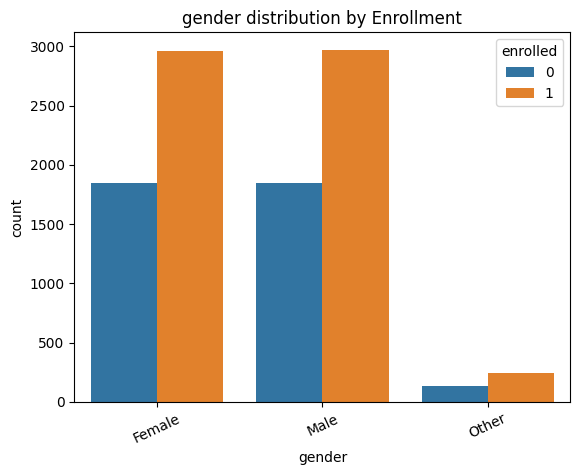

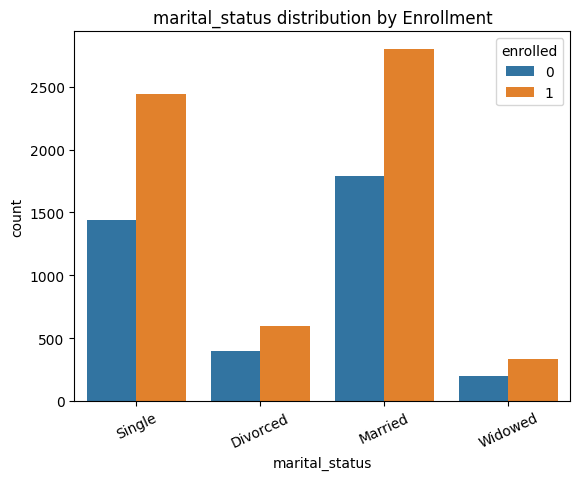

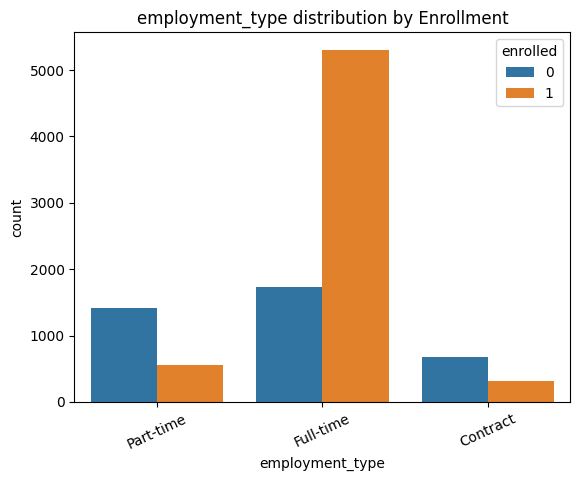

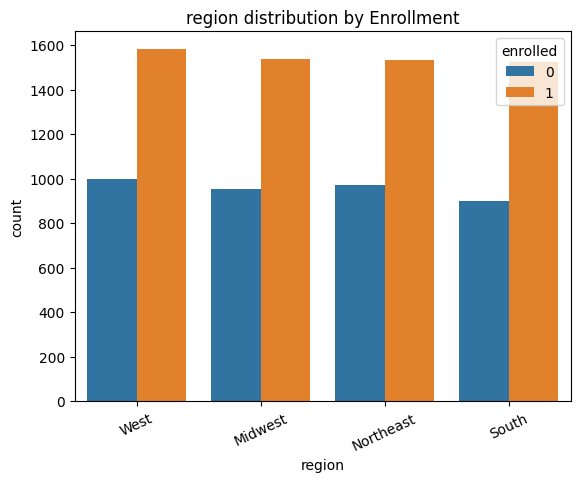

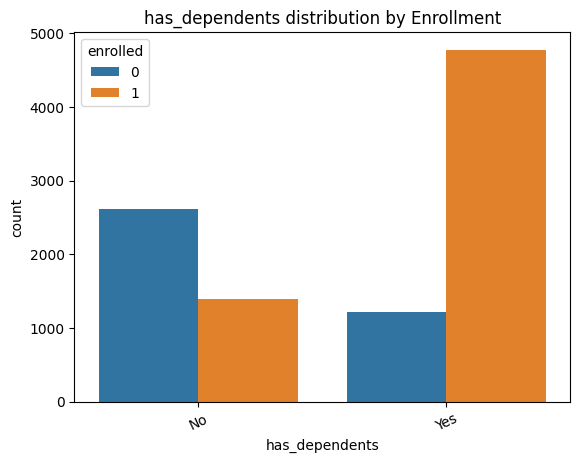

In [10]:
cat_cols = ['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']

for col in cat_cols:
    sns.countplot(data=df, x=col, hue='enrolled')
    plt.title(f"{col} distribution by Enrollment")
    plt.xticks(rotation=25)
    plt.show()


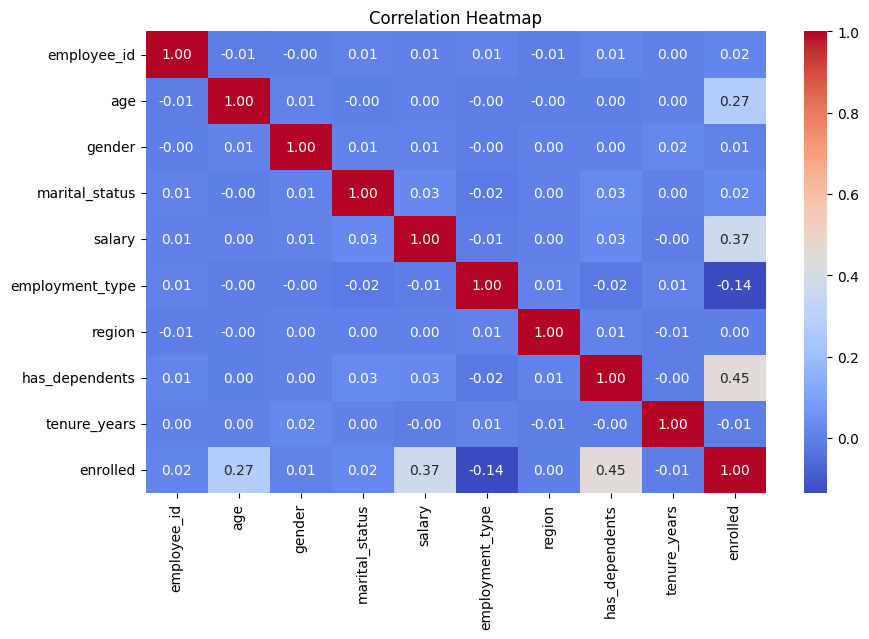

In [11]:
import numpy as np

df_corr = df.copy()
df_corr[cat_cols] = df_corr[cat_cols].astype('category').apply(lambda x: x.cat.codes)

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


c:\Users\uniat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\uniat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\uniat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\uniat\App

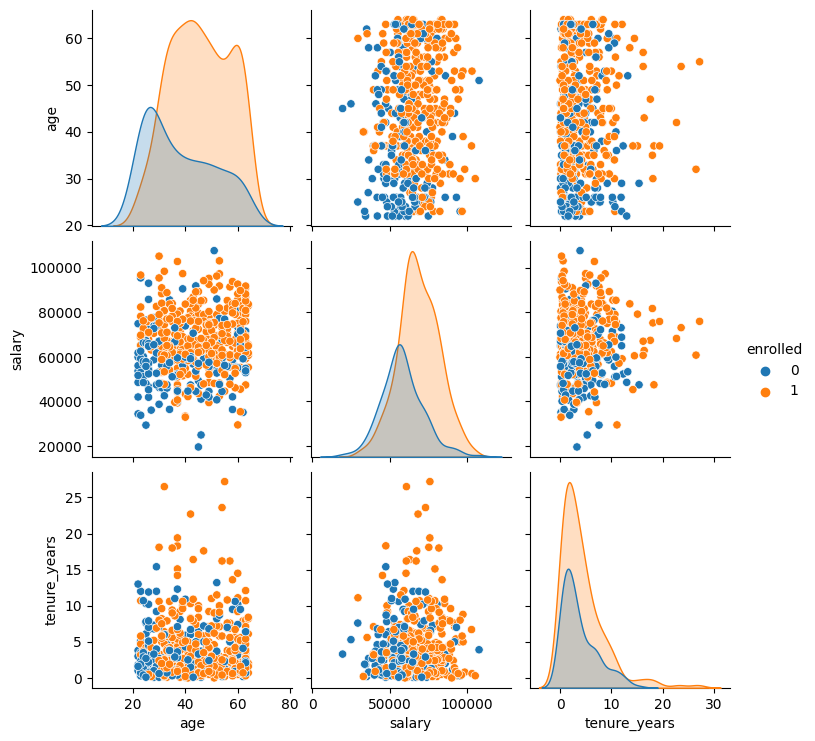

In [ ]:
sns.pairplot(df.sample(500), hue='enrolled', vars=num_cols)
plt.show()